In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import pandas as pd
sentiment = pd.read_json('/content/drive/MyDrive/Proyecto_final/globalsentiment.json',orient='records',lines=True)

In [3]:
bitcoin=pd.read_json('/content/drive/MyDrive/Proyecto_final/Bitcoin_price.json',orient='records',lines=True)

In [4]:
from datetime import datetime
sentiment['date']= pd.to_datetime(sentiment['date'], format='%d/%m/%y %H:%M:%S').astype(str)



In [5]:
sentiment = sentiment.sort_values(by="date").reset_index(drop=True)

In [6]:
sentiment=sentiment.rename(columns={"date": "date-sentiment"})

In [7]:
old=sentiment[8800:-9]
old=old.rename(columns={"sentiment": "score"})
old["label"]="NEUTRAL"
old["label"].loc[old["score"]>0.7]="POSITIVE"
old["label"].loc[old["score"]<0.4]="NEGATIVE"


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
old.to_json (r'data_extend2.json',orient='records',lines=True)

In [9]:
bitcoin['date']= pd.to_datetime(bitcoin['date'], format='%d/%m/%y %H:%M:%S')
bitcoin= bitcoin.sort_values(by="date").reset_index(drop=True)
bitcoin.head()

unix                date   symbol     open     high      low  \
0  1526364000 2018-05-15 06:00:00  BTC/USD  8733.86  8796.68  8707.28   
1  1526367600 2018-05-15 07:00:00  BTC/USD  8740.99  8766.00  8721.11   
2  1526371200 2018-05-15 08:00:00  BTC/USD  8739.00  8750.27  8660.53   
3  1526374800 2018-05-15 09:00:00  BTC/USD  8728.49  8754.40  8701.35   
4  1526378400 2018-05-15 10:00:00  BTC/USD  8708.32  8865.00  8695.11   

     close   Volume BTC  Volume USD  
0  8740.99   4906603.14      559.93  
1  8739.00   2390398.89      273.58  
2  8728.49   7986062.84      917.79  
3  8708.32   1593991.98      182.62  
4  8795.90  11101273.74     1260.69

In [10]:
from datetime import timedelta
bitcoin['date-sentiment']=bitcoin['date']- timedelta(hours=1)

In [11]:
bitcoin.head()

unix                date   symbol     open     high      low  \
0  1526364000 2018-05-15 06:00:00  BTC/USD  8733.86  8796.68  8707.28   
1  1526367600 2018-05-15 07:00:00  BTC/USD  8740.99  8766.00  8721.11   
2  1526371200 2018-05-15 08:00:00  BTC/USD  8739.00  8750.27  8660.53   
3  1526374800 2018-05-15 09:00:00  BTC/USD  8728.49  8754.40  8701.35   
4  1526378400 2018-05-15 10:00:00  BTC/USD  8708.32  8865.00  8695.11   

     close   Volume BTC  Volume USD      date-sentiment  
0  8740.99   4906603.14      559.93 2018-05-15 05:00:00  
1  8739.00   2390398.89      273.58 2018-05-15 06:00:00  
2  8728.49   7986062.84      917.79 2018-05-15 07:00:00  
3  8708.32   1593991.98      182.62 2018-05-15 08:00:00  
4  8795.90  11101273.74     1260.69 2018-05-15 09:00:00

In [17]:
sentiment['date-sentiment']=pd.to_datetime(sentiment['date-sentiment'], format='%Y-%m-%d %H:%M:%S')

In [18]:
data = pd.merge(sentiment, bitcoin, on="date-sentiment", how="left")
data = data.loc[ data['close'].isnull()==False]
data.head()

date-sentiment  sentiment          unix                date   symbol  \
1 2021-02-05 10:00:00   0.875262  1.612523e+09 2021-02-05 11:00:00  BTC/USD   
2 2021-02-05 11:00:00   0.823166  1.612526e+09 2021-02-05 12:00:00  BTC/USD   
3 2021-02-05 12:00:00   0.536745  1.612530e+09 2021-02-05 13:00:00  BTC/USD   
4 2021-02-05 13:00:00   0.544461  1.612534e+09 2021-02-05 14:00:00  BTC/USD   
5 2021-02-05 14:00:00   0.440784  1.612537e+09 2021-02-05 15:00:00  BTC/USD   

       open      high       low     close  Volume BTC    Volume USD  
1  37427.27  37775.89  37427.27  37745.68  101.295697  3.823475e+06  
2  37749.62  38168.36  37595.21  37907.00  444.407083  1.684614e+07  
3  37885.00  38351.04  37828.22  38333.77  307.770178  1.179799e+07  
4  38335.74  38350.26  38020.14  38153.19  439.239904  1.675840e+07  
5  38158.75  38359.69  37930.99  38000.00  288.558425  1.096522e+07

In [19]:
data.columns

Index(['date-sentiment', 'sentiment', 'unix', 'date', 'symbol', 'open', 'high',
       'low', 'close', 'Volume BTC', 'Volume USD'],
      dtype='object')

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM, GRU, Conv1D, Input,Bidirectional,Dropout

Seleccionamos las variables a tener en cuenta

In [21]:
data.set_index('date', inplace=True)

In [22]:
data

date-sentiment  sentiment          unix   symbol  \
date                                                                        
2021-02-05 11:00:00 2021-02-05 10:00:00   0.875262  1.612523e+09  BTC/USD   
2021-02-05 12:00:00 2021-02-05 11:00:00   0.823166  1.612526e+09  BTC/USD   
2021-02-05 13:00:00 2021-02-05 12:00:00   0.536745  1.612530e+09  BTC/USD   
2021-02-05 14:00:00 2021-02-05 13:00:00   0.544461  1.612534e+09  BTC/USD   
2021-02-05 15:00:00 2021-02-05 14:00:00   0.440784  1.612537e+09  BTC/USD   
...                                 ...        ...           ...      ...   
2022-03-24 05:00:00 2022-03-24 04:00:00   0.314212  1.648098e+09  BTC/USD   
2022-03-24 06:00:00 2022-03-24 05:00:00   0.521546  1.648102e+09  BTC/USD   
2022-03-24 07:00:00 2022-03-24 06:00:00   0.506678  1.648105e+09  BTC/USD   
2022-03-24 08:00:00 2022-03-24 07:00:00   0.506272  1.648109e+09  BTC/USD   
2022-03-24 09:00:00 2022-03-24 08:00:00   0.631344  1.648112e+09  BTC/USD   

                         open      high       low     close  Volume BTC  \
date                                                                      
2021-02-05 11:00:00  37427.27  37775.89  37427.27  37745.68  101.295697   
2021-02-05 12:00:00  37749.62  38168.36  37595.21  37907.00  444.407083   
2021-02-05 13:00:00  37885.00  38351.04  37828.22  38333.77  307.770178   
2021-02-05 14:00:00  38335.74  38350.26  38020.14  38153.19  439.239904   
2021-02-05 15:00:00  38158.75  38359.69  37930.99  38000.00  288.558425   
...                       ...       ...       ...       ...         ...   
2022-03-24 05:00:00  42932.91  43051.74  42811.19  43039.65   52.862074   
2022-03-24 06:00:00  43049.03  43492.74  43009.24  43236.80  230.537657   
2022-03-24 07:00:00  43243.61  43248.56  42937.90  43105.07  164.963526   
2022-03-24 08:00:00  43096.91  43195.06  42984.32  43082.54   83.380012   
2022-03-24 09:00:00  43066.68  43250.93  42855.54  43056.89   78.913787   

                       Volume USD  
date                               
2021-02-05 11:00:00  3.823475e+06  
2021-02-05 12:00:00  1.684614e+07  
2021-02-05 13:00:00  1.179799e+07  
2021-02-05 14:00:00  1.675840e+07  
2021-02-05 15:00:00  1.096522e+07  
...                           ...  
2022-03-24 05:00:00  2.275165e+06  
2022-03-24 06:00:00  9.967711e+06  
2022-03-24 07:00:00  7.110764e+06  
2022-03-24 08:00:00  3.592223e+06  
2022-03-24 09:00:00  3.397782e+06  

[9037 rows x 10 columns]

In [23]:
data= data[[ 'sentiment',  'open', 'high','low', 'close', 'Volume BTC', 'Volume USD']]

Normalizamos las variables

In [24]:
dataset = data.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print('dataset.shape', dataset.shape)
num_of_features = len(data.columns)
print('Number of features', num_of_features)

Number of features 7


In [25]:
def create_dataset(dataset, pred_col,term=1, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-term):
    a = dataset[i+1:(i+1+look_back), :]
    dataX.append(a)
    dataY.append(dataset[i + look_back+term, pred_col])
    #dataY.append(dataset[i + look_back, pred_col])
  return np.array(dataX), np.array(dataY)


In [26]:
def evaluation(model,trainX,testX,trainY,testY,num_of_features,pred_col):
      trainPredict = model.predict(trainX)
      testPredict = model.predict(testX)

      # Get something which has as many features as dataset
      trainPredict_extended = np.zeros((len(trainPredict),num_of_features))
      # Put the predictions there
      trainPredict_extended[:,pred_col] = trainPredict[:,0]
      # Inverse transform it and select the 3rd column.
      trainPredict = scaler.inverse_transform(trainPredict_extended) [:,pred_col]

      # Get something which has as many features as dataset
      testPredict_extended = np.zeros((len(testPredict),num_of_features))
      # Put the predictions there
      testPredict_extended[:,pred_col] = testPredict[:,0]
      # Inverse transform it and select the pred_col column.
      testPredict = scaler.inverse_transform(testPredict_extended)[:,pred_col] 

      trainY_extended = np.zeros((len(trainY),num_of_features))
      trainY_extended[:,pred_col]=trainY
      trainY = scaler.inverse_transform(trainY_extended)[:,pred_col]

      testY_extended = np.zeros((len(testY),num_of_features))
      testY_extended[:,pred_col]=testY
      testY = scaler.inverse_transform(testY_extended)[:,pred_col]

      # calculate root mean squared error
      trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
      testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

      # calculate absolute mean error
      trainScore_MAE = np.sum(np.absolute(trainY - trainPredict))/len(trainY)
      testScore_MAE = np.sum(np.absolute(testY - testPredict))/len(testY)

      print('-' * 50)
      print('Model summary:')
      model.summary()

      print('-' * 50)
      print('Train Score: %.2f RMSE' % (trainScore_RMSE))
      print('Test Score: %.2f RMSE' % (testScore_RMSE))

      print('-' * 50)
      print('Train Score: %.2f MAE' % (trainScore_MAE))
      print('Test Score: %.2f MAE' % (testScore_MAE))


      return trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE

In [27]:
def plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste):
      # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+ajuste:len(dataset)-1, pred_col] = testPredict

    # contruct pandas dataframe for plotting
    time_df = pd.DataFrame(data.index)
    time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
    df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
    df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
    time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
    time_df2.set_index('date',inplace=True)

    # plot the output
    fig, ax = plt.subplots(figsize=(15,7))
    time_df2.plot(ax=ax,rot=90,alpha=0.7)
    plt.xlabel('date')
    plt.ylabel('Bitcoin Value')
    plt.title('Bitcoin Price Prediction')
    plt.savefig(expr_name + '.png',bbox_inches = "tight")

## Estimación precio a 1 hora

In [ ]:
expr_name = 'expr_1'
look_back = 24*15
lstm_layers = 64
epochs=5
batch_size=64

Dividimos en train y test

In [ ]:
train_size_percent = 0.80
pred_col = data.columns.get_loc('close')

# function to split the data


train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, term=1,look_back=look_back)
testX, testY = create_dataset(test, pred_col, term=1, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)

Training dataset length  7229
Testing dataset length  1808
look_back  360


Modelo 1:

In [ ]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(lstm_layers, return_sequences=True, input_shape=(look_back,num_of_features)))
model.add(GRU(lstm_layers))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 360, 64)           18432     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 43,457
Trainable params: 43,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Epoch 1/10
97/97 [==============================] - 8s 34ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 5.5911e-04 - val_mean_squared_error: 5.5911e-04
Epoch 2/10
97/97 [==============================] - 2s 25ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 6.1493e-04 - val_mean_squared_error: 6.1493e-04
Epoch 3/10
97/97 [==============================] - 3s 28ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 6.6624e-04 - val_mean_squared_error: 6.6624e-04
Epoch 4/10
97/97 [==============================] - 3s 27ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 7.8645e-04 - val_mean_squared_error: 7.8645e-04
Epoch 5/10
97/97 [==============================] - 2s 25ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 8.6453e-04 - val_mean_squared_error: 8.6453e-04
Epoch 6/10
97/97 [==============================] - 2s 25ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 7.8140e-04 - val_mean_squared_erro

In [ ]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 360, 64)           18432     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 43,457
Trainable params: 43,457
Non-trainable params: 0
_________________________________________________________________
--------------------------------------------------
Train Score: 2341.41 RMSE
Test Score: 2096.02 RMSE
--------------------------------------------------
Train Score: 1941.50 MAE
Test Score: 1980.91 MAE


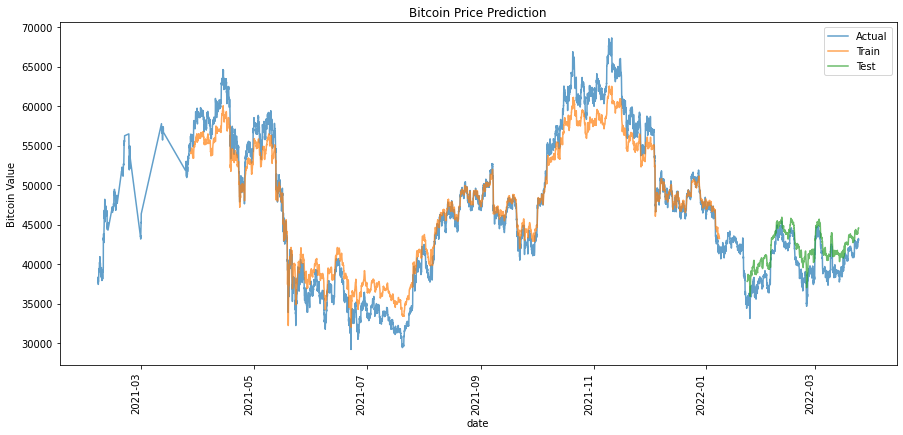

In [ ]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=1)

Modelo 2:

In [ ]:
epochs=15
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(lstm_layers)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model1h = Model(inputs=input_layer, outputs=output_layer)
model1h.summary()
model1h.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model1h.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 360, 7)]          0         
                                                                 
 conv1d (Conv1D)             (None, 360, 32)           1824      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,721
Trainable params: 26,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
97/97 [==============================] - 5s 21ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 2/15
97/97 [==========

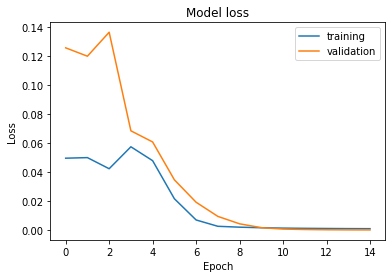

In [ ]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model1h,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 360, 7)]          0         
                                                                 
 conv1d (Conv1D)             (None, 360, 32)           1824      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,721
Trainable params: 26,721
Non-trainable params: 0
_________________________________________________________________
--------------------------------------------------
Train Score: 1138.44 RMSE
Test Score: 718.72 RMSE
----------------------

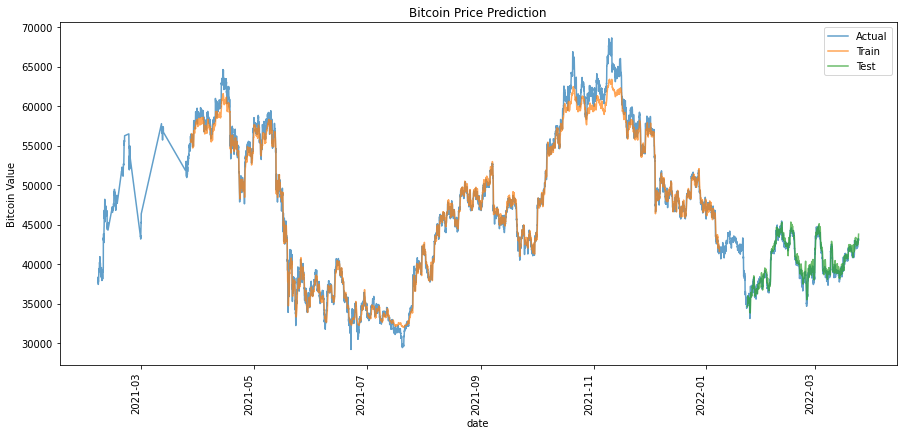

In [ ]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=1)

In [ ]:
testPredict[-1]

44306.70223838284

In [ ]:
data['close'][-1]

43056.89

In [ ]:
testPredict_prueba = model.predict(testX)
testPredict_prueba[-1]

array([0.4430444], dtype=float32)

Modelo 3:

In [ ]:
layers = 64
epochs=15
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
gru1 = GRU(lstm_layers,return_sequences=True)(conv1)
lstm1 = GRU(lstm_layers)(gru1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 360, 7)]          0         
                                                                 
 conv1d_14 (Conv1D)          (None, 360, 32)           1824      
                                                                 
 gru_10 (GRU)                (None, 360, 64)           18816     
                                                                 
 gru_11 (GRU)                (None, 64)                24960     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 45,665
Trainable params: 45,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
97/97 [==============================] - 7s

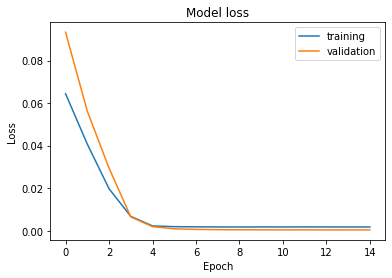

In [ ]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 360, 7)]          0         
                                                                 
 conv1d_14 (Conv1D)          (None, 360, 32)           1824      
                                                                 
 gru_10 (GRU)                (None, 360, 64)           18816     
                                                                 
 gru_11 (GRU)                (None, 64)                24960     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 45,665
Trainable params: 45,665
Non-trainable params: 0
______________________________________________________

In [ ]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=1)

Modelo 4

In [ ]:
expr_name = 'expr_1'
look_back = 24*10
lstm_layers = 64
epochs=5
batch_size=64

In [ ]:
train_size_percent = 0.80
pred_col = data.columns.get_loc('close')


train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, term=1,look_back=look_back)
testX, testY = create_dataset(test, pred_col, term=1, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)

Training dataset length  7229
Testing dataset length  1808
look_back  240


In [ ]:
epochs=15
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(lstm_layers)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 240, 7)]          0         
                                                                 
 conv1d_15 (Conv1D)          (None, 240, 32)           1824      
                                                                 
 lstm_14 (LSTM)              (None, 64)                24832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26,721
Trainable params: 26,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
99/99 [==============================] - 3s 17ms/step - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 2/15
99/99 [=======

In [ ]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 240, 7)]          0         
                                                                 
 conv1d_15 (Conv1D)          (None, 240, 32)           1824      
                                                                 
 lstm_14 (LSTM)              (None, 64)                24832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26,721
Trainable params: 26,721
Non-trainable params: 0
_________________________________________________________________
--------------------------------------------------
Train Score: 1132.83 RMSE
Test Score: 943.81 RMSE
-------------------

In [ ]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=1)

## Estimación precio a 24 horas

In [49]:
expr_name = 'expr_1'
look_back = 24*30
lstm_layers = 64
epochs=5
batch_size=64


In [50]:
train_size_percent = 0.80
pred_col = data.columns.get_loc('close')

train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, term=24,look_back=look_back)
testX, testY = create_dataset(test, pred_col, term=24, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)

Training dataset length  7229
Testing dataset length  1808
look_back  720


Modelo 1

In [ ]:
epochs=30
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = (GRU(lstm_layers,return_sequences=True))(conv1)
drop= Dropout(0.2)(lstm1)
lstm2 = GRU(lstm_layers)(drop)
output_layer = Dense(1, activation='sigmoid')(lstm2)
model24h = Model(inputs=input_layer, outputs=output_layer)
model24h.summary()
model24h.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model24h.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 720, 32)           1824      
                                                                 
 gru_3 (GRU)                 (None, 720, 64)           18816     
                                                                 
 dropout_1 (Dropout)         (None, 720, 64)           0         
                                                                 
 gru_4 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,665
Trainable params: 45,665
Non-trainable

In [ ]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model24h,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 720, 32)           1824      
                                                                 
 gru_3 (GRU)                 (None, 720, 64)           18816     
                                                                 
 dropout_1 (Dropout)         (None, 720, 64)           0         
                                                                 
 gru_4 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

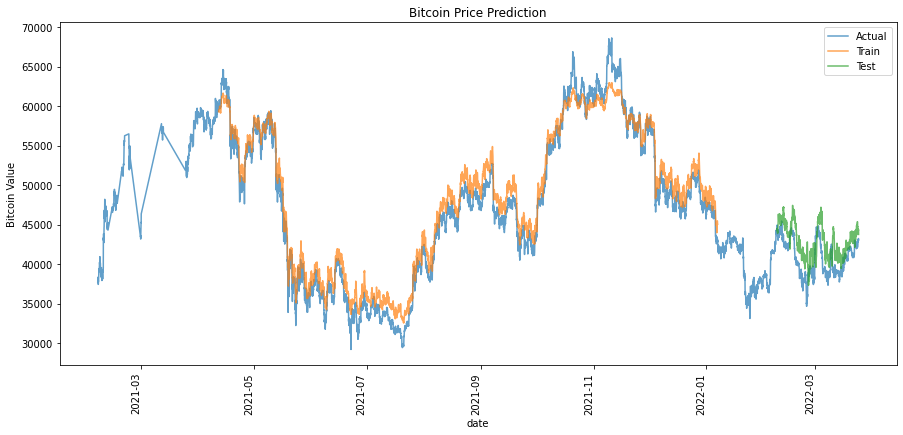

In [ ]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=47)

Modelo 2

In [30]:
epochs=30
input_layer = Input(shape=(look_back,num_of_features))

gru1 = (GRU(lstm_layers,return_sequences=True))(input_layer)
drop= Dropout(0.2)(gru1)
gru2 = GRU(lstm_layers)(drop)
Densa1 = Dense(50, activation='sigmoid')(gru2)
output_layer = Dense(1, activation='sigmoid')(Densa1)
model24h2 = Model(inputs=input_layer, outputs=output_layer)
model24h2.summary()
model24h2.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model24h2.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 gru (GRU)                   (None, 720, 64)           14016     
                                                                 
 dropout (Dropout)           (None, 720, 64)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 42,277
Trainable params: 42,277
Non-trainable p

In [31]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [32]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model24h2,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 gru (GRU)                   (None, 720, 64)           14016     
                                                                 
 dropout (Dropout)           (None, 720, 64)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                             

In [33]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=47)

Modelo 3

In [38]:
epochs=30
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = (LSTM(lstm_layers,return_sequences=True))(conv1)
drop= Dropout(0.5)(lstm1)
lstm2 = LSTM(lstm_layers)(drop)
output_layer = Dense(1, activation='sigmoid')(lstm2)
model24h3 = Model(inputs=input_layer, outputs=output_layer)
model24h3.summary()
model24h3.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model24h3.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 720, 32)           1824      
                                                                 
 lstm_2 (LSTM)               (None, 720, 64)           24832     
                                                                 
 dropout_2 (Dropout)         (None, 720, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 59,745
Trainable params: 59,745
Non-trainable

In [39]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [40]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model24h3,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 720, 7)]          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 720, 32)           1824      
                                                                 
 lstm_2 (LSTM)               (None, 720, 64)           24832     
                                                                 
 dropout_2 (Dropout)         (None, 720, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

In [41]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=47)

Modelo 4

In [63]:
epochs=30
input_layer = Input(shape=(look_back,num_of_features))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = Bidirectional(LSTM(lstm_layers,return_sequences=True))(conv1)
drop= Dropout(0.5)(lstm1)
gru2 = GRU(lstm_layers)(drop)
output_layer = Dense(1, activation='sigmoid')(gru2)
model24h4 = Model(inputs=input_layer, outputs=output_layer)
model24h4.summary()
model24h4.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history= model24h4.fit(trainX, trainY,validation_split=0.10, epochs=epochs, batch_size=batch_size,shuffle=False,verbose=1)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 720, 7)]          0         
                                                                 
 conv1d_11 (Conv1D)          (None, 720, 32)           1824      
                                                                 
 bidirectional_1 (Bidirectio  (None, 720, 128)         49664     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 720, 128)          0         
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                          

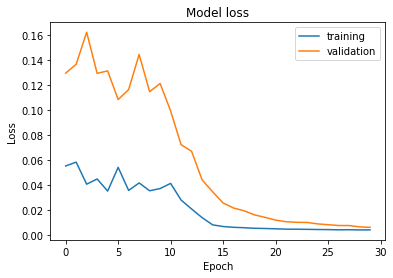

In [64]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [65]:
trainPredict,testPredict,trainScore_RMSE,testScore_RMSE,trainScore_MAE,testScore_MAE=evaluation(model24h4,trainX,testX,trainY,testY,num_of_features,pred_col)

--------------------------------------------------
Model summary:
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 720, 7)]          0         
                                                                 
 conv1d_11 (Conv1D)          (None, 720, 32)           1824      
                                                                 
 bidirectional_1 (Bidirectio  (None, 720, 128)         49664     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 720, 128)          0         
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_13 (Dense)            (None, 1)                 65 

In [66]:
plot_evaluation(data,dataset,trainPredict,testPredict,look_back,pred_col,ajuste=47)

## Predicción 1 hora ejemplo:

In [ ]:
def create_dataset_pred(dataset, pred_col, look_back=1,term=1):
  
  dataX = dataset[-look_back-term:-term, :]
  dataY = dataset[ -1, pred_col]
    #dataY.append(dataset[i + look_back, pred_col])
  return np.array(dataX), np.array(dataY)

In [ ]:
predX, predY =create_dataset_pred(dataset, pred_col, look_back)
predX = np.reshape(predX, (1,predX.shape[0], num_of_features))

In [ ]:
prediciont= model1h.predict([predX])

In [ ]:
prediction= np.zeros((1,num_of_features))
prediction[:,pred_col] = prediciont
prediction= scaler.inverse_transform(prediction)
prediction=prediction[:,pred_col]
prediction

array([43785.73339118])

In [ ]:
real= np.zeros((1,num_of_features))
real[:,pred_col] = predY
real= scaler.inverse_transform(real)[:,pred_col]
real

Error = real-prediction
print(Error)

[-728.84488794]


Predicción 24 hora ejemplo:

In [ ]:
predX, predY =create_dataset_pred(dataset, pred_col, look_back,term=24)
predX = np.reshape(predX, (1,predX.shape[0], num_of_features))

In [ ]:
prediciont= model24h.predict([predX])

In [ ]:
prediction= np.zeros((1,num_of_features))
prediction[:,pred_col] = prediciont
prediction= scaler.inverse_transform(prediction)
prediction=prediction[:,pred_col]
prediction

array([44102.95626304])

In [ ]:
real= np.zeros((1,num_of_features))
real[:,pred_col] = predY
real= scaler.inverse_transform(real)[:,pred_col]
real

Error = real-prediction
print(Error)

[-1046.0677598]
